### 这是用 FFT算周期的失败尝试

In [2]:
import numpy as np
import matplotlib.pyplot as plt


### 逐差法算周期

In [473]:
#计算周期
import numpy as np
import matplotlib.pyplot as plt
b = np.loadtxt('z_of_end_eta_0.14....txt', skiprows = 8)
i,j = 0,0
root = []
for i in range(b.shape[0]-2):
    if b[i, 1] > 1.5 and b[i+1, 1] < 1.5:
        root.append(b[i, 0].item())

T1 = [t for t in root[ : -1]]
T2 = [t for t in root[1 : ]]
T = np.array(T2) - np.array(T1)

print(f'periods are {T}s')
print(f'\naverage of period is {np.mean(T)}')


periods are [2.95]s

average of period is 2.95


### 画本体系中角速度随时间的变化

In [122]:
#在本体系中的角速度
total = np.loadtxt('total.txt', skiprows = 8)
print(total)
s = 7001
rotmat = np.zeros((s, 3, 3))

print(t.shape)
for i in range(s):
    rotmat[i, 0: ,0:] = np.array([total[(j+3)*s+i, 1] for j in range(9)]).reshape(3,3)
print(rotmat[0,:,:])
angv = np.zeros((s ,3))
for i in range(s):
    angv[i, 0:] = np.array([total[j*s+i, 1] for j in range(3)])

#把角速度变换到本体坐标系（用COMSOL输出的变换矩阵）
angv_inh = np.zeros((s, 3))
for i in range(s):
    angv_inh[i, 0:] = np.dot(rotmat[i, 0:, 0:], angv[i, 0:])
print(angv_inh)

t = total[0:s, 0]

ax = plt.subplot(111)
ax.plot(t,angv_inh[0:, 2])
ax.set_ylabel('z component of angular velocity/s')
ax.set_xlabel('time/s')
ax.set_title('Period to perturbation')
ax.legend(['error bar','analytical', 'Comsol simulation'])

[[ 0.00000000e+00  1.00031586e-01]
 [ 1.00000000e-03  1.02287581e-01]
 [ 2.00000000e-03  1.04541891e-01]
 ...
 [ 6.99800000e+00 -9.11688034e-01]
 [ 6.99900000e+00 -9.12367638e-01]
 [ 7.00000000e+00 -9.13044291e-01]]
(7001,)
[[ 9.99999938e-01  3.51858363e-04 -1.39976559e-06]
 [-3.51858361e-04  9.99999938e-01  1.40057793e-06]
 [ 1.40025831e-06 -1.40008533e-06  1.00000000e+00]]
[[  0.10003159   0.10000114  25.13274042]
 [  0.10228889   0.10008328  25.13273127]
 [  0.10454806   0.10016692  25.13272191]
 ...
 [ 10.12968416   1.72442141 -22.9884341 ]
 [ 10.09377205   1.7183088  -23.00430422]
 [ 10.05796521   1.71221341 -23.0200611 ]]


### 不同的翻转模式
$\omega_x$不变号或者$\omega_y$不变号

In [468]:
#展示两种旋转
total = np.loadtxt('total_oscillation.txt', skiprows = 8)
print(total)
s = 701
rotmat = np.zeros((s, 3, 3))
for i in range(s):
    rotmat[i, 0: ,0:] = np.array([total[(j+3)*s+i, 1] for j in range(9)]).reshape(3,3)
print(rotmat[0,:,:])
angv = np.zeros((s ,3))
for i in range(s):
    angv[i, 0:] = np.array([total[j*s+i, 1] for j in range(3)])
#把角速度变换到刚体坐标系
angv_inh = np.zeros((s, 3))
for i in range(s):
    angv_inh[i, 0:] = np.dot(rotmat[i, 0:, 0:], angv[i, 0:])
print(angv_inh)

ax = plt.subplot(121)
ax.plot(total[0:s,0 ], angv_inh[0:, 0], color='steelblue')
ax.plot(total[0:s,0 ], angv_inh[0:, 1], color='darkorange')
ax.set_title('flip about x')
ax.set_xlabel('time/s')
ax.set_ylabel('angular velocity/(rad/s)')
ax.legend(['omega_x', 'omega_y'],loc='upper right')


total = np.loadtxt('total_rotation.txt', skiprows = 8)
print(total)
s = 701
rotmat = np.zeros((s, 3, 3))
for i in range(s):
    rotmat[i, 0: ,0:] = np.array([total[(j+3)*s+i, 1] for j in range(9)]).reshape(3,3)
print(rotmat[0,:,:])
angv = np.zeros((s ,3))
for i in range(s):
    angv[i, 0:] = np.array([total[j*s+i, 1] for j in range(3)])
#把角速度变换到刚体坐标系
angv_inh = np.zeros((s, 3))
for i in range(s):
    angv_inh[i, 0:] = np.dot(rotmat[i, 0:, 0:], angv[i, 0:])
print(angv_inh)

ax = plt.subplot(122)
ax.plot(total[0:s,0 ], angv_inh[0:, 0], color='steelblue')
ax.plot(total[0:s,0 ], angv_inh[0:, 1], color='darkorange')
ax.set_title('flip about y')
ax.set_xlabel('time/s')
ax.set_ylabel('angular velocity/(rad/s)')
ax.set_ylim([-65,65])
ax.legend(['omega_x', 'omega_y'],loc='upper right')

[[0.         0.10007776]
 [0.01       0.15180302]
 [0.02       0.18220506]
 ...
 [6.98       0.98000264]
 [6.99       0.98383021]
 [7.         0.9869535 ]]
[[ 9.99999613e-01  8.79645730e-04 -1.39942208e-06]
 [-8.79645728e-04  9.99999613e-01  1.40143212e-06]
 [ 1.40065430e-06 -1.40020058e-06  1.00000000e+00]]
[[  0.10007776   0.10000365  62.83184231]
 [  0.15646345   0.10307309  62.83171839]
 [  0.21486577   0.10709121  62.83153538]
 ...
 [-12.38356184   2.10668978  61.58349064]
 [-11.26060999   1.91570703  61.7997637 ]
 [-10.23642727   1.7416063   61.97853305]]
[[0.         1.00007761]
 [0.01       1.05109419]
 [0.02       1.07651678]
 ...
 [6.98       0.99971481]
 [6.99       0.99967536]
 [7.         0.99969912]]
[[ 9.99999613e-01  8.79645727e-04 -1.39409915e-06]
 [-8.79645707e-04  9.99999613e-01  1.40014292e-05]
 [ 1.40641491e-06 -1.40001974e-05  1.00000000e+00]]
[[ 1.00007761e+00  1.00024489e-01  6.28318412e+01]
 [ 1.06071569e+00  1.18004890e-01  6.28308331e+01]
 [ 1.13189324e+00  1

### 验证COMSOL模拟中能量变化较小

In [ ]:
total = np.loadtxt('total_kinetic_energy.txt', skiprows = 8)
t = np.zeros((30001, 1))
E = t.copy()
for i in range(30001):
    t[i] = total[i, 0]
    E[i] = total[i, 1]
ax = plt.subplot(121)
plt.plot(t, E)
ax.set_ylabel('J')
ax.set_xlabel('time/s')
ax.set_title('kinetic energy')

total = np.loadtxt('z_of_end.txt', skiprows = 8)
print(total)
s = 30001
rotmat = np.zeros((s, 3, 3))
for i in range(s):
    rotmat[i, 0: ,0:] = np.array([total[(j+3)*s+i, 1] for j in range(9)]).reshape(3,3)
print(rotmat[0,:,:])
angv = np.zeros((s ,3))
for i in range(s):
    angv[i, 0:] = np.array([total[j*s+i, 1] for j in range(3)])
#把角速度变换到刚体坐标系
angv_inh = np.zeros((s, 3))
for i in range(s):
    angv_inh[i, 0:] = np.dot(rotmat[i, 0:, 0:], angv[i, 0:])
print(angv_inh)
ax = plt.subplot(122)
plt.plot(t,angv_inh[0:, 2])
ax.set_ylabel('rad times s^{-1}')
ax.set_xlabel('time/s')
ax.set_title('z component of angular velocity in inertial frame')

### 翻转周期和初始扰动角速度的关系

In [443]:
#画周期随扰动改变
variables = np.array([1.00E-02, 5.00E-02, 1.00E-01, 1.00E+00, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9])
measure = np.array([2.92,2.685,2.49,1.55,2.21,2.04,1.93,1.85,1.77,1.7,1.64,1.59])
error = np.array([0.3,0.11,0.06,0.01,0.01,0.01,0.02,0.02,0.01,0.01,0.01,0.01])
analytic = np.array([3.45,2.79,2.5,1.55,2.21,2.05,1.93,1.84,1.76,1.7,1.64,1.59])

together = np.vstack((variables, measure, error, analytic))
together = together.T
together = together[np.argsort(together[:,0])].copy()
together = together.T

variables = together[0, 0:]
measure = together[1, 0:]
error = together[2, 0:]
analytic = together[3, 0:]
print(((analytic-measure)**2/measure.shape[0]).sum())

begin_index = 3
rms = np.sqrt(((analytic-measure)**2/measure**2).sum()/(analytic.shape[0]))
rms_fixed = np.sqrt(((analytic[begin_index:]-measure[begin_index:])**2/measure[begin_index:]**2).sum()/(analytic.shape[0]-2))
print(f'rms of relative diviation={rms}, fixed={rms_fixed}')
ax = plt.subplot(111)

ax.fill_between(variables, measure-error, measure+error, color='bisque')
ax.scatter(variables, analytic, color='steelblue', marker = 'x')
ax.scatter(variables, measure,color = 'darkorange',marker='+')


ax.set_ylabel('period/s')
ax.set_xlabel('perturbation: eta/(rad/s)')
ax.set_title('Period to perturbation')
ax.set_xlim([0,1.05])
ax.legend(['error bar','analytical', 'Comsol simulation'])

0.024360416666666686
rms of relative diviation=0.05367752684002563, fixed=0.0029183374567917516


### 画周期和初始z方向角速度关系

In [ ]:
# 画周期和初始角速度关系图
I1 = 0.004991533321536976;
I3 = 0.0025488085055485918;
I2 = 0.002680218008436362;
eta1 = np.linspace(0,0.03,10)
eta3 = np.linspace(0,0.2,10)
eta1, eta3 = np.meshgrid(eta1, eta3)
omega = 20*np.pi

# eta1 =eta3 = 0.1
# omega = np.linspace(0,50*np.pi,14)
a1 = (I2 - I3)/(I2* I3);
a2 = (I3 - I1)/(I1* I3);
a3 = (I1 - I2)/(I1* I2);
a = (I2**2 * omega**2 + I1**2 * eta1**2 + I3**2 * eta3**2)/(
  I2 * omega**2 + I1 * eta1**2 + I3 * eta3**2)
b = (I2 * omega**2 + I1 * eta1**2 + I3 * eta3**2)/np.sqrt(
  I2**2 * omega**2 + I1**2 * eta1**2 + I3**2 * eta3**2)
alpha = np.sqrt((a * b**2 * I2 * (a - I3))/(I2 - I3))
beta = np.sqrt((a * b**2 * I2 * (I1 - a))/(I1 - I2))

t = 4/np.sqrt(a1*a3)/alpha * (-(1/2*np.log(1-(alpha/beta)**(-2))) + 2*np.log(2))


t_rigrous = np.loadtxt('t_to_omega_rigrous.txt')
print(t_rigrous.shape)
omega_rigrous = np.linspace(0,50*np.pi,21)

omega_measure = np.array([45*np.pi,40*np.pi, 35*np.pi, 30*np.pi,25*np.pi, 62.83185307, 56.54866776, 50.26548246, 43.98229715, 37.69911184, 31.41592654, 25.13274123, 18.84955592, 12.56637061])
t_measure = np.array([1.286, 1.366, 1.532, 1.73, 2.044, 2.49, 2.7, 3.03, 3.39, 3.82, 4.44, 5.316, 6.685, 9.211])
measure_error = np.array([0.08, 0.06, 0.033, 0.07, 0.04, 0.06, 0.05, 0.04, 0.02, 0.025, 0.015, 0.007, 0.04, 0.03])
m,b = np.polyfit(omega_measure, 1/t_measure, 1)
r = 1-((m*omega_measure+b-1/t_measure)**2/(1/t_measure-1/np.mean(t_measure))).sum()

# ax = plt.subplot(111,projection='3d')
# ax.scatter(eta1, eta3, t)
ax = plt.subplot(133)
ax.plot([2*np.pi,2*np.pi],[1.1, 0], ls=':', color='darkgrey')
ax.plot(omega, (beta/alpha)**2)
ax.set_title('elliptic integral parameter k to omega_z')
ax.set_xlabel('initial omega_z/(rad/s)')
ax.set_ylabel('k')
ax.legend(['omega = 2pi rad/s'])

ax = plt.subplot(132)

ax.plot(omega, 1/t,color='steelblue',zorder =2, ls = '--')
ax.plot(omega_rigrous, 1/t_rigrous, color='lightskyblue',zorder=1)
ax.scatter(omega_measure, 1/t_measure, marker = '+',color='darkorange',zorder=3)

ax.set_xlabel('initial omega_z/(rad/s)')
ax.set_ylabel('flip frequency/(1/s)')
ax.set_title('flip frequency to omega_z')
ax.legend(['first order approximation', 'rigrous analytical solution', 'measured period'])

ax = plt.subplot(131)

ax.plot(omega_measure, m*omega_measure+b, color= 'steelblue')
ax.fill_between(omega_measure, 1/(t_measure-measure_error), 1/(t_measure+measure_error),zorder=1, color= 'bisque')
ax.scatter(omega_measure, 1/t_measure, marker = '+',color='darkorange',zorder=3)
ax.set_xlabel('initial omega_z/(rad/s)')
ax.set_ylabel('flip frequency/(1/s)')
ax.set_xlim([0,145])
ax.set_ylim([0,0.85])
ax.set_title('flip frequency to omega_z')
ax.legend(['linear fit','error bar', 'measured data'])

print(np.sqrt((1/t_measure-1/t)**2/t.shape[0]).sum())
print(f'{m},{r}')

### 初始扰动空间中的周期发散

当$\eta_x$和$\eta_y$取特定值时周期也会发散，但是对扰动、模拟误差很敏感，在COMSOL模拟中无法得到

C:\Users\weenming\AppData\Local\Temp\ipykernel_38420\790223913.py:24: RuntimeWarning: divide by zero encountered in log
  t = 4/np.sqrt(a1*a3)/alpha * (-(1/2*np.log(1-(alpha/beta)**(-2))) + 2*np.log(2))
C:\Users\weenming\AppData\Local\Temp\ipykernel_38420\790223913.py:24: RuntimeWarning: invalid value encountered in log
  t = 4/np.sqrt(a1*a3)/alpha * (-(1/2*np.log(1-(alpha/beta)**(-2))) + 2*np.log(2))
C:\Users\weenming\AppData\Local\Temp\ipykernel_38420\790223913.py:25: RuntimeWarning: divide by zero encountered in log
  t2 = -4* np.sqrt((I1* I2* I3)/((I3 - I2) *(H**2 - 2 *K* I1)))*1/2 *np.log(1 - (alpha/beta)**2)
C:\Users\weenming\AppData\Local\Temp\ipykernel_38420\790223913.py:25: RuntimeWarning: invalid value encountered in log
  t2 = -4* np.sqrt((I1* I2* I3)/((I3 - I2) *(H**2 - 2 *K* I1)))*1/2 *np.log(1 - (alpha/beta)**2)


Text(0.5, 0.92, 'singularity in initial parameter space')

d:\python\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:124: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


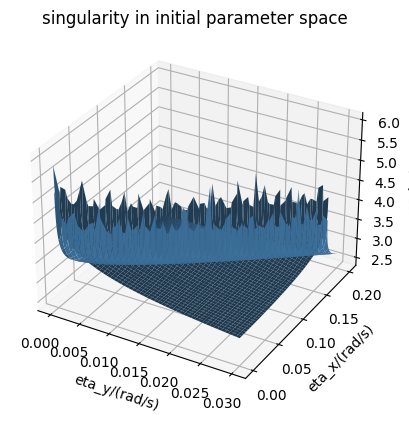

In [4]:
# 画周期和初始角速度,三维图奇点
I1 = 0.004991533321536976;
I3 = 0.0025488085055485918;
I2 = 0.002680218008436362;
eta1 = np.linspace(0,0.03,1000)
eta3 = np.linspace(0,0.2,1000)
eta1, eta3 = np.meshgrid(eta1, eta3)
omega = 20*np.pi

# eta1 =eta3 = 0.1
# omega = np.linspace(0,50*np.pi,14)
a1 = (I2 - I3)/(I2* I3);
a2 = (I3 - I1)/(I1* I3);
a3 = (I1 - I2)/(I1* I2);
a = (I2**2 * omega**2 + I1**2 * eta1**2 + I3**2 * eta3**2)/(
  I2 * omega**2 + I1 * eta1**2 + I3 * eta3**2)
b = (I2 * omega**2 + I1 * eta1**2 + I3 * eta3**2)/np.sqrt(
  I2**2 * omega**2 + I1**2 * eta1**2 + I3**2 * eta3**2)
alpha = np.sqrt((a * b**2 * I2 * (a - I3))/(I2 - I3))
beta = np.sqrt((a * b**2 * I2 * (I1 - a))/(I1 - I2))
H = np.sqrt((I2*omega)**2 + I1**2*eta1**2+I3**2*eta3**2)
K = 1/2*(I1*eta1**2+I2*omega**2+I3*eta3**2)

t = 4/np.sqrt(a1*a3)/alpha * (-(1/2*np.log(1-(alpha/beta)**(-2))) + 2*np.log(2))
t2 = -4* np.sqrt((I1* I2* I3)/((I3 - I2) *(H**2 - 2 *K* I1)))*1/2 *np.log(1 - (alpha/beta)**2)


omega_rigrous = np.linspace(0,50*np.pi,21)

omega_measure = np.array([45*np.pi,40*np.pi, 35*np.pi, 30*np.pi,25*np.pi, 62.83185307, 56.54866776, 50.26548246, 43.98229715, 37.69911184, 31.41592654, 25.13274123, 18.84955592, 12.56637061])
t_measure = np.array([1.286, 1.366, 1.532, 1.73, 2.044, 2.49, 2.7, 3.03, 3.39, 3.82, 4.44, 5.316, 6.685, 9.211])
measure_error = np.array([0.08, 0.06, 0.033, 0.07, 0.04, 0.06, 0.05, 0.04, 0.02, 0.025, 0.015, 0.007, 0.04, 0.03])
m,b = np.polyfit(omega_measure, 1/t_measure, 1)
r = 1-((m*omega_measure+b-1/t_measure)**2/(1/t_measure-1/np.mean(t_measure))).sum()


dx = dy = 0.5 * np.ones_like(t)

ax = plt.subplot(111,projection='3d')
ax.plot_surface(eta1, eta3, t, color = 'steelblue')
ax.plot_surface(eta1, eta3, t2, color='steelblue')
ax.set_xlabel('eta_y/(rad/s)')
ax.set_ylabel('eta_x/(rad/s)')
ax.set_zlabel('period/s')
ax.set_title('singularity in initial parameter space')




### 翻转耗时
翻转耗时的零阶近似和初始扰动无关，是一个稳定的测量量，所以在COMSOL模拟中可以看到

#### 示意图

In [551]:
#翻转耗时
file = np.loadtxt('z_of_end_40pi.txt',skiprows=8)
t = file[:, 0]
z = file[:, 1]
ax = plt.subplot(121)
ax.plot(t[:3000],z[:3000],color='steelblue')
ax.plot([0, 3], [5.38618,5.38618], color='darkgrey',ls=':')
ax.plot([0, 3], [-2.40599,-2.40599], color='darkgrey',ls=':')
ax.plot([0.51129, 0.51129], [-4,6], color='black', ls=':')
ax.plot([0.6925, 0.6925], [-4,6], color='black', ls=':')
mid = (np.max(z)+np.min(z))/2
half_height = np.max(z)-mid
high = mid+half_height/np.sqrt(2)
low = 2*mid - high
print(high)
print(low)
for i in range(z.shape[0]-1):
    if z[i] > high and z[i+1] < high:
        start = t[i]
    if z[i] >low and z[i+1] < low:
        end = t[i]
        print(end-start)

5.386183745781534
-2.406010430952904
0.08100000000000002
0.08000000000000007
0.08099999999999996
0.08099999999999996


<ipython-input-551-47ed7923bfaf>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(121)


#### 线性拟合

[ 1.66666667  2.20264317  2.73972603  3.30033003  3.84615385  5.49450549
  6.84931507  8.26446281  9.61538462 11.11111111 12.34567901]
[ 1.64607931  2.1972425   2.74840569  3.29956888  3.85073207  5.50422163
  6.88212961  8.26003758  9.63794556 11.01585353 12.39376151]
0.10715942971955776
0.08772034612177881,-0.007410264101478735,0.9982295817010258


C:\Users\weenming\AppData\Local\Temp\ipykernel_38420\3408484598.py:29: RuntimeWarning: divide by zero encountered in divide
  t = (I2-I3)*(2*I2*(I1-I2)*np.log(1+np.sqrt(2)))/((I1-I2)*np.sqrt((I1-I2)*(I2-I3)/(I1*I3))*(I2*(I2-I3)*omega))


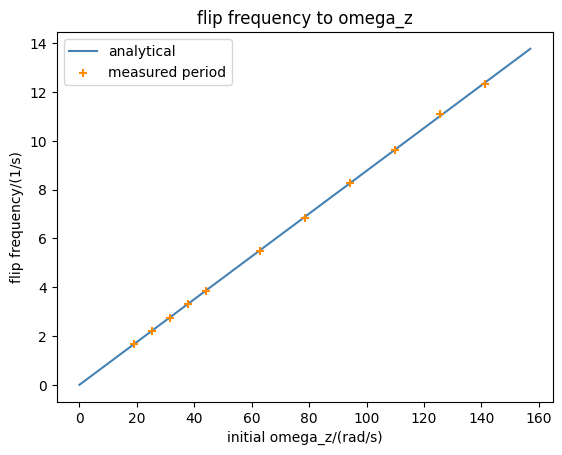

In [6]:
omega_measure = np.array([6*np.pi,8*np.pi,10*np.pi,12*np.pi,14*np.pi,20*np.pi,25*np.pi,30*np.pi,35*np.pi,40*np.pi,45*np.pi])
t_measure = np.array([0.6,0.454,0.365,0.303,0.26,0.182,0.146,0.121,0.104,0.09,0.081])

m,b0 = np.polyfit(omega_measure, 1/t_measure, 1)
r = 1-((m*omega_measure+b0-1/t_measure)**2/(1/t_measure-1/np.mean(t_measure))).sum()



I1 = 0.004991533321536976;
I3 = 0.0025488085055485918;
I2 = 0.002680218008436362;
# eta1 = np.linspace(0,0.03,10)
# eta3 = np.linspace(0,0.2,10)
# eta1, eta3 = np.meshgrid(eta1, eta3)
# omega = 20*np.pi

eta1 =eta3 = 0.1
omega = np.linspace(0,50*np.pi,11)
a1 = (I2 - I3)/(I2* I3);
a2 = (I3 - I1)/(I1* I3);
a3 = (I1 - I2)/(I1* I2);
a = (I2**2 * omega**2 + I1**2 * eta1**2 + I3**2 * eta3**2)/(
  I2 * omega**2 + I1 * eta1**2 + I3 * eta3**2)
b = (I2 * omega**2 + I1 * eta1**2 + I3 * eta3**2)/np.sqrt(
  I2**2 * omega**2 + I1**2 * eta1**2 + I3**2 * eta3**2)
alpha = np.sqrt((a * b**2 * I2 * (a - I3))/(I2 - I3))
beta = np.sqrt((a * b**2 * I2 * (I1 - a))/(I1 - I2))

t = (I2-I3)*(2*I2*(I1-I2)*np.log(1+np.sqrt(2)))/((I1-I2)*np.sqrt((I1-I2)*(I2-I3)/(I1*I3))*(I2*(I2-I3)*omega))

# ax = plt.subplot(111,projection='3d')
# ax.scatter(eta1, eta3, t)

ax = plt.subplot(111)

ax.plot(omega, 1/t,color='steelblue',zorder=1)

ax.scatter(omega_measure, 1/t_measure, marker = '+',color='darkorange',zorder=2)

ax.set_xlabel('initial omega_z/(rad/s)')
ax.set_ylabel('flip frequency/(1/s)')
ax.set_title('flip frequency to omega_z')
ax.legend(['analytical', 'measured period'])

print(1/t_measure)
print(omega_measure*m+b0)
print(np.sqrt((1/t_measure-m*omega_measure-b0)**2/(1/t_measure-np.mean(1/t_measure))**2).sum())
print(f'{m},{b0},{r}')
